<a href="https://colab.research.google.com/github/piero0090/RepoData2/blob/main/Python_Analisis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

*IMDb (abreviatura de Internet Movie Database) es una base de datos en línea de información relacionada con películas, series de televisión, vídeos domésticos, videojuegos y contenidos en línea en streaming, que incluye biografías del reparto, del equipo de producción y personales, resúmenes de la trama, trivialidades, clasificaciones y reseñas de fans y críticos.*

# **Lectura de datos**

In [2]:
#Dataset de películas
df01 = pd.read_csv('/content/imdb(MOVIES).csv')
df01.name = 'Peliculas'
df01.head(3)

,ranking of movie,movie name,Year,certificate,runtime,genre,RATING,DETAIL ABOUT MOVIE,DIRECTOR,ACTOR 1,ACTOR 2,ACTOR 3,ACTOR 4,votes,metascore,GROSS COLLECTION
0,1,Jai Bhim,-2021,TV-MA,164 min,"Crime, Drama",9.4,When a tribal man is arrested for a case of al...,T.J. Gnanavel,Suriya,Lijo Mol Jose,Manikandan,Rajisha Vijayan,163431,NaN,NaN
1,2,The Shawshank Redemption,-1994,R,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2515762,80.0,$28.34M
2,3,The Godfather,-1972,R,175 min,"Crime, Drama",9.2,"The Godfather follows Vito Corleone, Don of th...",Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1732749,100.0,$134.97M


In [3]:
#Dataset de videojuegos
df02 = pd.read_csv('/content/imdb(VIDEO GAMES).csv')
df02.name = 'Videojuegos'
df02.head(3)

,RANKING,VIDEO GAME NAME,Year,genre,Rating,DETAILS,DIRECTOR,ACTOR-1,ACTOR-2,ACTOR-3,ACTOR-4,VOTES,certificate
0,1,The Witcher 3: Wild Hunt - Blood and Wine,(2016 Video Game),"Action, Adventure, Drama",9.8,Geralt is in the southern province of Toussain...,Konrad Tomaszkiewicz,Doug Cockle,MyAnna Buring,Antonia Bernath,Mark Noble,6942,NaN
1,2,Red Dead Redemption II,(2018 Video Game),"Action, Adventure, Crime",9.7,Amidst the decline of the Wild West at the tur...,Benjamin Byron Davis,Roger Clark,Rob Wiethoff,Cali Elizabeth Moore,NaN,29498,M
2,3,The Witcher 3: Wild Hunt,(2015 Video Game),"Action, Adventure, Drama",9.7,A monster hunter for hire embarks on an epic j...,Konrad Tomaszkiewicz,Doug Cockle,Denise Gough,Jo Wyatt,Jaimi Barbakoff,23644,M


In [4]:
#Dataset de series
df03 = pd.read_csv('/content/imdb(SERIES).csv')
df03.name = 'Series'
df03.head(3)

,ranking,series name,Year,certificate,runtime,genre,rating,DETAILS,ACTOR 1,ACTOR 2,ACTOR 3,ACTOR 4,VOTES
0,1,Breaking Bad,(2008–2013),TV-MA,49 min,"Crime, Drama, Thriller",9.4,A high school chemistry teacher diagnosed with...,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,"16,28,943"
1,2,Game of Thrones,(2011–2019),TV-MA,57 min,"Action, Adventure, Drama",9.2,Nine noble families fight for control over the...,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,"19,22,377"
2,3,Chernobyl,-2019,TV-MA,330 min,"Drama, History, Thriller",9.4,"In April 1986, an explosion at the Chernobyl n...",Jessie Buckley,Jared Harris,Stellan Skarsgård,Adam Nagaitis,"6,37,741"


In [5]:
print('El dataset de Películas tiene',df01.shape[0],'registros y',df01.shape[1],'columnas')
print('El dataset de Videojuegos tiene',df02.shape[0],'registros y',df02.shape[1],'columnas')
print('El dataset de Series tiene',df03.shape[0],'registros y',df03.shape[1],'columnas')

El dataset de Películas tiene 250 registros y 16 columnas
El dataset de Videojuegos tiene 250 registros y 13 columnas
El dataset de Series tiene 250 registros y 13 columnas


# **Limpieza de datos**



*Antes de realizar cualquier operación, se realizará un cambio de nombre de las columnas. En la `Operación 1`, se tendran listas de los nombres que se cambiarán a las columnas. En la función creada se tomará como parámetros el dataset y una lista correspondiente, utilizando la función de rename para cambiar el nombre a las columnas a través de un bucle.*

In [6]:
#Operacion 01
lista01 = [ 'Ranking', 'Nombre_pelicula', 'Año', 'Calificacion','Duracion',  'Genero', 
       'Puntuacion','Detalle','Director', 'Actor01',  'Actor02',  'Actor03', 'Actor04',  'Votos', 'Metascore', 
       'Recaudacion']
lista02 = ['Ranking', 'Nombre_VJ', 'Año', 'Genero', 'Puntuacion', 'Detalle', 'Director', 'Actor01',
           'Actor02', 'Actor03', 'Actor04', 'Votos', 'Certificado']
lista03 = ['Ranking', 'Nombre_serie', 'Año', 'Calificacion','Duracion',  'Genero', 
       'Puntuacion','Detalle', 'Actor01',  'Actor02',  'Actor03', 'Actor04',  'Votos']

def Operacion01(df,lista):
  for i in range (df.shape[1]):
    df.rename(columns={df.columns[i]:lista[i]}, inplace=True)

In [7]:
Operacion01(df01, lista01)
Operacion01(df02, lista02)
Operacion01(df03, lista03)

*Antes de realizar un análisis de los 3 datasets, se debe realizar una limpieza de los datos. Primero se revisará si los dataframes presentan valores nulos con la `Operación 02`. Esta operación primero buscará el nombre de las columnas que contengan valores nulos con la función `isnull` aplicado a columns del dataframe; después, se obtendrá el número total de valores nulos dentro del dataset con la función `isnull` y `sum`*

In [8]:
def Operacion02(df):
  col_nulos = df.columns[df.isnull().any()]
  num_nulos = df.isnull().sum().sum()
  print('El dataframe',df.name,'presenta',num_nulos,'valores nulos en las columnas',col_nulos)

In [9]:
Operacion02(df01)
Operacion02(df02)
Operacion02(df03)

El dataframe Peliculas presenta 68 valores nulos en las columnas Index(['Metascore', 'Recaudacion'], dtype='object')
El dataframe Videojuegos presenta 192 valores nulos en las columnas Index(['Genero', 'Puntuacion', 'Director', 'Actor01', 'Actor02', 'Actor03',
       'Actor04', 'Certificado'],
      dtype='object')
El dataframe Series presenta 2 valores nulos en las columnas Index(['Duracion'], dtype='object')


*Existen valores nulos en las variables de todos los datasets. Para no afectar los datos, se eliminarán las filas que contengan valores nulos*

In [10]:
df01.dropna(inplace = True)
df02.dropna(inplace = True)
df03.dropna(inplace = True)

In [11]:
#Eliminando columnas inncesarias
df01.drop(['Ranking', 'Detalle'], axis='columns', inplace =True)
df02.drop(['Ranking', 'Detalle'], axis='columns', inplace =True)
df03.drop(['Ranking', 'Detalle'], axis='columns', inplace =True)

In [12]:
df01.head(3)

,Nombre_pelicula,Año,Calificacion,Duracion,Genero,Puntuacion,Director,Actor01,Actor02,Actor03,Actor04,Votos,Metascore,Recaudacion
1,The Shawshank Redemption,-1994,R,142 min,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2515762,80.0,$28.34M
2,The Godfather,-1972,R,175 min,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1732749,100.0,$134.97M
3,The Dark Knight,-2008,PG-13,152 min,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2466041,84.0,$534.86M


*Los datasets tienen columnas que deben ser de tipo número; sin embargo, estas variables son de tipo texto y contienen algunos caracteres extras. Por ello se realizó la **Operación 02** para lidiar con este problema. Con `astype` primero nos aseguramos que la columna sea de tipo string para aplicar expresiones regulares. Con `.str.extractall('(\d+)')` se extraeran solo los digitos de las columnas. `.unstack()` trae los números coincidentes a la misma fila que la cadena original. `.fillna('')` 
elimina los NaN que ciertas cadenas pueden tener. `.sum(axis=1)` reunirá todos los números en una sola celda,  realizando una suma, el argumento axis=1 sumará los valores de fila. Y finalmente, `.astype(int)` convierte el resultado en un número entero. Todo ello corresponde a la `Operación 03`*

In [13]:
#Operación 03 
df01['Año'] = df01['Año'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype('int')
df01['Duracion'] = df01['Duracion'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype('int')
df01['Recaudacion'] = df01['Recaudacion'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype('int')*10000

In [14]:
df01.head(3)

,Nombre_pelicula,Año,Calificacion,Duracion,Genero,Puntuacion,Director,Actor01,Actor02,Actor03,Actor04,Votos,Metascore,Recaudacion
1,The Shawshank Redemption,1994,R,142,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2515762,80.0,28340000
2,The Godfather,1972,R,175,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1732749,100.0,134970000
3,The Dark Knight,2008,PG-13,152,"Action, Crime, Drama",9.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2466041,84.0,534860000


In [15]:
df02['Año'] = df02['Año'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype('int')

*La `Operación04` se empleó solo para el Dataframe 03, pues el dato de año es un rango, por lo que primero se debe extraer solo los números que contenga. Para ello, se empleó una función similar a la Operación 03 que permitía tener solo los números del año. Sin embargo, para los rangos de años, se extrajo los ultimos 4 digitos del resultado de la primera función con la función de módulo*

In [16]:
def Operacion04(df):
  df['Año'] = df['Año'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype('int')
  df['Año'] = df['Año']%10000

In [17]:
Operacion04(df03)

In [18]:
#Transformacion de Votos para dataframe03
df03['Votos'] = df03['Votos'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype('int')

In [19]:
#https://www.kaggle.com/code/jadelau/film-analysis-imdb-1000-movies-in-june-2022#Q2.-Any-correlations-among-IMDB-ratings-and-other-film-features?

# **Operaciones**

In [20]:
df01.head(2)

,Nombre_pelicula,Año,Calificacion,Duracion,Genero,Puntuacion,Director,Actor01,Actor02,Actor03,Actor04,Votos,Metascore,Recaudacion
1,The Shawshank Redemption,1994,R,142,Drama,9.3,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2515762,80.0,28340000
2,The Godfather,1972,R,175,"Crime, Drama",9.2,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1732749,100.0,134970000


In [21]:
df02.head(2)

,Nombre_VJ,Año,Genero,Puntuacion,Director,Actor01,Actor02,Actor03,Actor04,Votos,Certificado
2,The Witcher 3: Wild Hunt,2015,"Action, Adventure, Drama",9.7,Konrad Tomaszkiewicz,Doug Cockle,Denise Gough,Jo Wyatt,Jaimi Barbakoff,23644,M
3,The Last of Us,2013,"Action, Adventure, Drama",9.7,Neil Druckmann,Jeffrey Pierce,Ashley Johnson,Troy Baker,Hana Hayes,56289,M


In [22]:
df03.head(2)

,Nombre_serie,Año,Calificacion,Duracion,Genero,Puntuacion,Actor01,Actor02,Actor03,Actor04,Votos
0,Breaking Bad,2013,TV-MA,49 min,"Crime, Drama, Thriller",9.4,Bryan Cranston,Aaron Paul,Anna Gunn,Betsy Brandt,1628943
1,Game of Thrones,2019,TV-MA,57 min,"Action, Adventure, Drama",9.2,Emilia Clarke,Peter Dinklage,Kit Harington,Lena Headey,1922377


In [23]:
#Votos
def Operacion05(df):
  resultado = df.groupby(['Año']).Votos.agg([len, min, max]).sort_index(ascending=True)
  return resultado

*Para la `Operacion 05` se realizó una agrupación por año de los votos de cada dataset. En base a ello, se sacó el mínimo, máximo y longitud de la variable Votos (se refiere a cuantas personas votaron por la película, videojuego o serie en IMDB), con la función `agg` que recibe como argumentos len, min y max*

In [24]:
Votos01 = Operacion05(df01)
Votos02 = Operacion05(df02)
Votos03 = Operacion05(df03)

# **Visualización de datos**

In [25]:
d1 = Votos01.sample(n=29).sort_index(ascending = True)
d3 = Votos03.sample(n=29).sort_index(ascending = True)
Votos02.sort_index(ascending = True, inplace = True)

*El  `Grafico 01` se toma por ejes los años y los votos en la página de IMDB. Como resultado podemos decir que las películas han sido más valoradas en esta página que las series. Además podemos observar que los videojuegos a penas tienen votos, empezando a partir de principios del año 2000; es decir, que los pocos votos de los videojuegos a comparación de las series y películas coincide con el nacimiento de este medio de entretenimiento (videojuegos).* 

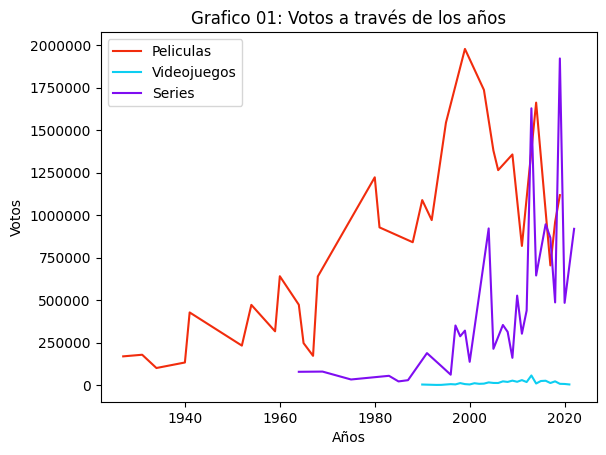

In [50]:
plt.plot(d1.index, d1['max'], label='Peliculas', color='#F12C0D')
plt.plot(Votos02.index, Votos02['max'], label='Videojuegos', color='#0DCEF1')
plt.plot(d3.index, d3['max'], label='Series', color='#7F0DF1')
plt.title('Grafico 01: Votos a través de los años')
plt.xlabel('Años')
plt.ylabel('Votos')
plt.ticklabel_format(axis="y", style="plain", scilimits=(0,0)) 
plt.legend()
plt.show()

In [51]:
#EXTRACCION CON OTRAS OPERACIONES (USAR QUERY)